In [918]:
#data manipulation
import numpy as np 
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Load in the Data and Examine

In [919]:
# Read in  data
play = pd.read_csv('Data/play_evaluation.csv', sep=';')
sales = pd.read_csv('Data/sales_evaluation.csv', sep=';')
play.head()

,Date,Platform,build_version,client_id,outcome,experience_points
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308
1,2015-11-14,PS4,1.0.1,p231ep4ebbp,win,510.737943
2,2015-11-26,PS4,1.0.1,p1321p488fp,win,333.307999
3,2015-12-03,PC,1.0.1,pzda4p4z98p,win,542.839919
4,2015-11-22,PC,1.0.1,pe8e7p40a9p,win,381.683084


In [920]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
Date                 30000 non-null object
Platform             30000 non-null object
build_version        30000 non-null object
client_id            30000 non-null object
outcome              30000 non-null object
experience_points    30000 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


There is a row in data cell that exceeds the number of days in a month; I will drop that value 

In [921]:
play = play.replace('2015-11-31', np.nan).dropna()

In [922]:
#Transform Data column from object type to datatime, in order to do transformation and stitstics with it
play['Date'] = pd.to_datetime(play['Date'])

In [923]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29084 entries, 0 to 29999
Data columns (total 6 columns):
Date                 29084 non-null datetime64[ns]
Platform             29084 non-null object
build_version        29084 non-null object
client_id            29084 non-null object
outcome              29084 non-null object
experience_points    29084 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.6+ MB


In [924]:
sales.head()

,store_item_name,client_id,Date,dollar_spent
0,pack_a,pac2dp471ap,2015-12-02,0.99
1,pack_a,p6718p11e7p,2015-12-08,0.99
2,bundle_9,pczbap4facp,2015-11-23,18.50
3,pack_a,p606cp4fe8p,2015-11-25,0.99
4,pack_b,pc06ep11e6p,2015-11-18,1.20


In [925]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 4 columns):
store_item_name    5936 non-null object
client_id          5936 non-null object
Date               5936 non-null object
dollar_spent       5936 non-null float64
dtypes: float64(1), object(3)
memory usage: 185.6+ KB


Same procedure for the Sales table

In [926]:
sales = sales.replace('2015-11-31', np.nan).dropna()

In [927]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [928]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5733 entries, 0 to 5935
Data columns (total 4 columns):
store_item_name    5733 non-null object
client_id          5733 non-null object
Date               5733 non-null datetime64[ns]
dollar_spent       5733 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 223.9+ KB


#### Checking for missing values

In [929]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [930]:
# Missing values statistics
missing_values = missing_values_table(play)
missing_values.head()

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [931]:
# Missing values statistics
missing_values = missing_values_table(sales)
missing_values.head()

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


No missing values!!!

### Question A

- __Daily Active User* segmented by platform__

In [932]:
#play.groupby(['Date', 'Platform']).count()
DAU=play.groupby(['Date', 'Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 
DAU.head()                                         

,Date,Platform,client_id
0,2015-11-12,PC,236
1,2015-11-12,PS4,115
2,2015-11-13,PC,246
3,2015-11-13,PS4,133
4,2015-11-14,PC,250


In [933]:
DAU.set_index('Platform', inplace=True)

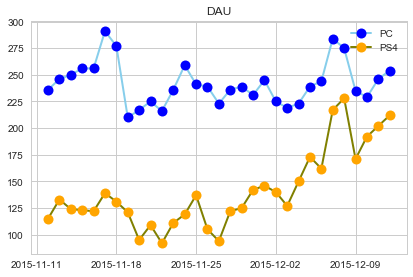

In [1014]:
plt.plot( 'Date', 'client_id', data=DAU.loc['PC'], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Date', 'client_id', data=DAU.loc['PS4'], marker='o', markerfacecolor='orange',color='olive', markersize=10, linewidth=2, label="PS4" )
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
plt.title('DAU');


As per table and plot from above, the number of daily active users on PC Platform is very high compared with the number of the number of daily active users on PS4 Platform (more than 2 times) at he begining of the period, whereas the number for both platforms are getting close to an equal number by the end of the period.

In [935]:
sales.rename(columns={'Date':'Purchase'}, inplace=True)

- __Daily Active Customer* segmented by platform__

Both tables must be merged in order to segment the DAC by platform

In [936]:
play= play.merge(sales, on = 'client_id', how = 'left')

In [937]:
play.head()

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Purchase,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99


In [938]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80543 entries, 0 to 80542
Data columns (total 9 columns):
Date                 80543 non-null datetime64[ns]
Platform             80543 non-null object
build_version        80543 non-null object
client_id            80543 non-null object
outcome              80543 non-null object
experience_points    80543 non-null float64
store_item_name      68504 non-null object
Purchase             68504 non-null datetime64[ns]
dollar_spent         68504 non-null float64
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 6.1+ MB


__Checking for missing values again, since we merged the two tables which have different total number of entries.__

In [939]:
missing_values = missing_values_table(play)
missing_values.head()

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
store_item_name,12039,14.9
Purchase,12039,14.9
dollar_spent,12039,14.9


Missing values are normal after aligning two tables with different number of entries.

In [940]:
#deleting the rows with missing values
play.dropna(subset = ['store_item_name', 'Purchase', 'dollar_spent'])

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Purchase,dollar_spent
0,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-12-02,1.99
1,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-08,0.99
2,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_c,2015-11-19,1.99
3,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,bundle_1,2015-12-05,15.99
4,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-12-11,0.99
5,2015-12-08,PC,1.0.2,pczzdp11e6p,win,295.636308,pack_a,2015-11-14,0.99
10,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-25,0.99
11,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-24,0.99
12,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,pack_a,2015-11-14,0.99
13,2015-12-04,PC,1.0.2,p9873p11e7p,lose,268.443363,bundle_3,2015-12-08,21.99


In [941]:
#play.groupby(['Period', 'Platform']).count()
DAC=play.groupby(['Purchase', 'Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 
DAC.head()    

,Purchase,Platform,client_id
0,2015-11-12,PC,107
1,2015-11-12,PS4,59
2,2015-11-13,PC,108
3,2015-11-13,PS4,69
4,2015-11-14,PC,127


In [942]:
DAC.set_index('Platform', inplace=True)

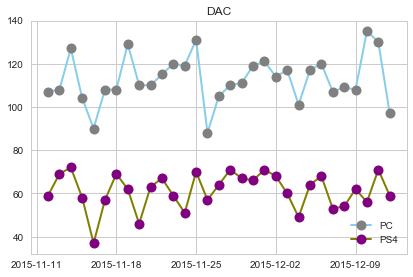

In [1015]:
plt.plot( 'Purchase', 'client_id', data=DAC.loc['PC'], marker='o', markerfacecolor='grey', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'client_id', data=DAC.loc['PS4'], marker='o', markerfacecolor='purple',color='olive', markersize=10, linewidth=2, label="PS4")
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
plt.title('DAC');

As per table and plot from above, the number of active customers on PC Platform is very high compared with the number of the number of active users on PS4 Platform (more than 2 times) the studied period, whereas the variation in number coincide for both cases.

- __Daily Revenue* segmented by platform__

In [944]:
DR=play.groupby(['Purchase', 'Platform'],as_index=False).agg({'dollar_spent': lambda x: x.sum()}) 
DR.head()

,Purchase,Platform,dollar_spent
0,2015-11-12,PC,7787.86
1,2015-11-12,PS4,6892.36
2,2015-11-13,PC,4182.08
3,2015-11-13,PS4,3930.50
4,2015-11-14,PC,5225.48


In [945]:
DR.set_index('Platform', inplace=True)

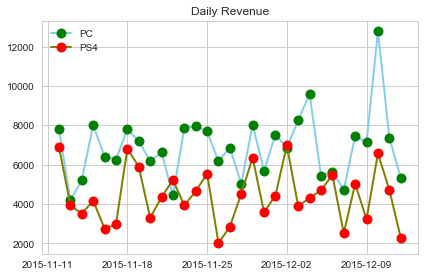

In [1016]:
plt.plot( 'Purchase', 'dollar_spent', data=DR.loc['PC'], marker='o', markerfacecolor='green', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'dollar_spent', data=DR.loc['PS4'], marker='o', markerfacecolor='red',color='olive', markersize=10, linewidth=2, label="PS4" )
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
plt.title('Daily Revenue');

As per table and plot from above, the value of daily revenue on PC Platform and the value of of daily revenue on PS4 Platform, over the studied period, has very high variations. Sometime, the pic  variations show two times difference in value.


- __Daily Conversion* segmented by platform__

In [947]:

DC=play[play["Date"]==play["Purchase"]].groupby(['Date', 'Purchase', 'Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 

In [948]:
DC.head()

,Date,Purchase,Platform,client_id
0,2015-11-12,2015-11-12,PC,23
1,2015-11-12,2015-11-12,PS4,12
2,2015-11-13,2015-11-13,PC,16
3,2015-11-13,2015-11-13,PS4,14
4,2015-11-14,2015-11-14,PC,21


In [949]:
START = pd.read_csv('play_evaluation.csv', sep=';')

In [950]:
active=START.groupby(['Date','Platform'],as_index=False).agg({'client_id': lambda x: x.nunique()}) 
active.head()

,Date,Platform,client_id
0,2015-11-12,PC,236
1,2015-11-12,PS4,115
2,2015-11-13,PC,246
3,2015-11-13,PS4,133
4,2015-11-14,PC,250


In [951]:
DC['conversion%']=DC['client_id']/active['client_id']*100

In [952]:
DC.head()

,Date,Purchase,Platform,client_id,conversion%
0,2015-11-12,2015-11-12,PC,23,9.745763
1,2015-11-12,2015-11-12,PS4,12,10.434783
2,2015-11-13,2015-11-13,PC,16,6.504065
3,2015-11-13,2015-11-13,PS4,14,10.526316
4,2015-11-14,2015-11-14,PC,21,8.400000


In [953]:
DC.set_index('Platform', inplace=True)

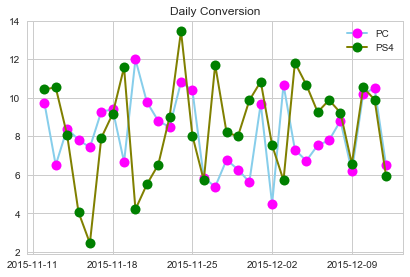

In [1017]:
plt.plot( 'Purchase', 'conversion%', data=DC.loc['PC'], marker='o', markerfacecolor='magenta', markersize=10, color='skyblue', linewidth=2, label="PC")
plt.plot( 'Purchase', 'conversion%', data=DC.loc['PS4'], marker='o', markerfacecolor='green',color='olive', markersize=10, linewidth=2, label="PS4" )
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
plt.title('Daily Conversion');

As per table and plot from above, the value of daily conversion on PC Platform and the value of of daily conversion on PS4 Platform, over the studied period, has very high variations.At the very beginig of the period, the variation picks between the two values are almost triple, getting to a closer value by the end of the period. 

- __Day-7 Retention segmented by platform__ 

In [955]:
play['Date'].min()

Timestamp('2015-11-12 00:00:00')

In [956]:
df = play.loc[play['Date'] == "2015-11-12"]

In [957]:
df.head()

,Date,Platform,build_version,client_id,outcome,experience_points,store_item_name,Purchase,dollar_spent
178,2015-11-12,PC,1.0.1,pz6bap11e7p,win,409.139422,pack_c,2015-12-11,1.99
179,2015-11-12,PC,1.0.1,pz6bap11e7p,win,409.139422,pack_a,2015-11-21,0.99
180,2015-11-12,PC,1.0.1,pz6bap11e7p,win,409.139422,pack_b,2015-11-22,1.20
181,2015-11-12,PC,1.0.1,pz6bap11e7p,win,409.139422,pack_a,2015-11-27,0.99
204,2015-11-12,PC,1.0.1,pdzz4p11e6p,lose,261.153433,pack_a,2015-11-30,0.99


In [958]:
df.groupby('Date')['client_id'].nunique()

Date
2015-11-12    351
Name: client_id, dtype: int64

In [959]:
df.client_id.unique()

array(['pz6bap11e7p', 'pdzz4p11e6p', 'pzf01p11e7p', 'pz796p11e7p',
       'p21c4p11e7p', 'p0dbbp401dp', 'pbd92p11e6p', 'pd8f7p11e6p',
       'p7492p11e7p', 'pd8cdp42dep', 'pbf00p11e6p', 'p9bz6p4ab3p',
       'pc2e0p11e6p', 'p4267p4b10p', 'p7za3p4e77p', 'p6z80p4e03p',
       'pe8e7p40a9p', 'p9118p11e7p', 'pd62bp499cp', 'pz6d8p11e7p',
       'p1ae0p4800p', 'pa463p4c99p', 'pc364p11e6p', 'pb33ep40aap',
       'p7721p4e84p', 'p38c8p4d6dp', 'pz360p11e7p', 'p4162p11e7p',
       'pbfc1p11e6p', 'p880cp11e7p', 'pbdf4p11e6p', 'pc68dp4739p',
       'pb16cp4a6cp', 'p160bp11e7p', 'p9f99p11e7p', 'pe6f1p44b0p',
       'p60d8p492zp', 'p98e2p11e7p', 'pzzf2p11e7p', 'pbe78p11e6p',
       'p77a2p11e7p', 'p16dbp4e30p', 'p79f4p11e7p', 'p9c4ap11e7p',
       'p0e7zp4eefp', 'p2fd9p11e7p', 'p16e7p4a26p', 'pa1f3p11e7p',
       'pa99dp48a7p', 'pz9f1p11e7p', 'p7fe1p4e4cp', 'p89e4p11e7p',
       'p80aap4z82p', 'p86dzp11e7p', 'p6f0cp11e7p', 'p660dp11e7p',
       'pa0f4p11e7p', 'pc47dp11e6p', 'p86dzp4z3cp', 'p63z4p492

In [960]:
dz = play.loc[play['Date'] == "2015-11-19"]

In [961]:
dz.groupby('Date')['client_id'].nunique()

Date
2015-11-19    331
Name: client_id, dtype: int64

In [962]:
dz.client_id.unique()

array(['p8az7p11e7p', 'p3992p11e7p', 'p0dbbp401dp', 'pfebzp11e6p',
       'pzd03p4d26p', 'p1ec9p47b4p', 'pdc27p4aeap', 'p86abp4728p',
       'pc39ep11e6p', 'p7a73p4022p', 'pz60zp4fc6p', 'pa463p4c99p',
       'pb9dcp40c1p', 'p6416p4339p', 'p16dbp4e30p', 'pzze0p11e7p',
       'p6909p11e7p', 'p6fbbp476zp', 'pfz20p11e6p', 'pccbcp11e6p',
       'p7721p4e84p', 'p4e3ap4236p', 'paf4cp40b1p', 'pdeacp11e6p',
       'p9989p11e7p', 'p7b8zp404ap', 'p6d2bp4aaap', 'p1z04p4zb0p',
       'p490cp11e7p', 'pc43ap11e6p', 'pd24cp4db3p', 'p7c74p11e7p',
       'pc3d8p11e6p', 'paa0ap4c0dp', 'pbe99p11e6p', 'pf048p4bb6p',
       'pbf00p11e6p', 'p69dap11e7p', 'p993bp11e7p', 'pb7f7p4c34p',
       'p9fcbp11e7p', 'p16e7p4a26p', 'pbea3p11e6p', 'p1f88p4f9dp',
       'p4942p4396p', 'p630bp4771p', 'pd2d8p11e6p', 'p8z0dp11e7p',
       'pczf6p4848p', 'p14bzp11e7p', 'p9cadp40ebp', 'pe989p4e07p',
       'p881cp4416p', 'p8dbap11e7p', 'p3314p4b68p', 'pf6e4p4b70p',
       'pd46fp48fcp', 'p6f0cp11e7p', 'pcae3p11e6p', 'p2ezzp449

In [963]:
len(set(dz.client_id.unique()) & set(df.client_id.unique()))

135

In [964]:
retention_7=len(set(dz.client_id.unique()) & set(df.client_id.unique()))/351*100
retention_7

38.46153846153847

### Question B

Just to take a quick look at which build version and item brings the highest revenue (set apart from the client id):

#### Impact of build_version on sales

In [965]:
play.groupby(['build_version']).sum()

,experience_points,dollar_spent
build_version,,
1.0.1,2.166129e+07,230226.54
1.0.2,1.180162e+07,120691.91


It seems that the __first built version, 1.01., brought the highest revenue__. We can guess from the experience points that it might be due to the fact that players sticked with the first version and did not update the game, or just because the game's retention was not high.

#### Items that are the most prefered/profitable

In [966]:
dr=play.groupby(['store_item_name'],as_index=False).sum()
dr.head()

,store_item_name,experience_points,dollar_spent
0,bundle_1,9.850839e+05,37800.36
1,bundle_10,1.097678e+06,48729.00
2,bundle_2,8.852011e+05,3198.00
3,bundle_3,1.037321e+06,54689.13
4,bundle_8,1.080563e+06,48155.50


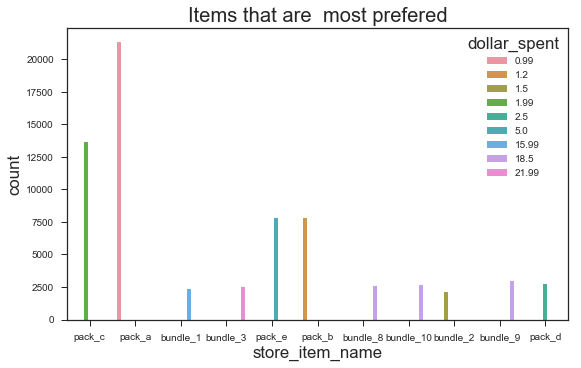

In [1001]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper

fig.set_size_inches(8, 5)
ax = sns.countplot(x="store_item_name", hue="dollar_spent", data=play)
plt.title('Items that are  most prefered');

In [968]:
play.groupby('store_item_name')['dollar_spent'].sum().max()

54982.0

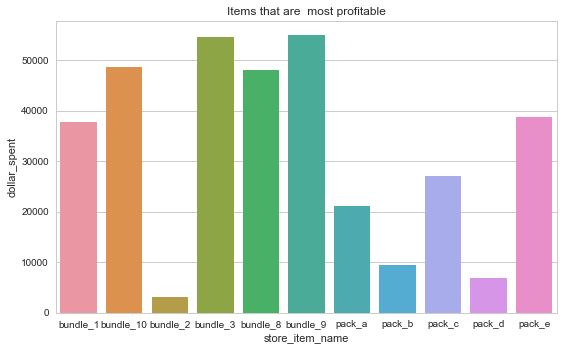

In [1003]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.set(style="whitegrid")
ax = sns.barplot(x="store_item_name", y="dollar_spent", data=dr)
plt.title('Items that are  most profitable');

In [970]:
play.groupby('store_item_name')['dollar_spent'].sum().max()

54982.0

From the plot above, it results that __bundle_9 brings the highest revenue__(most profitable), although the __item most aquired is pack_a__(most preferred), due to the fact that is the cheapest.

#### We  now can look to see if the player's spending behaviour 

The method that I am applying for customer segmentation is similar the the FRM technique that uses past purchase behavior to divide customers
into groups. I have considered recency, pack (lately removed), monetary value and player's level in order to place them in segments.

Since the data is pretty ready to usem we'll have to find out the first and last order dates in the data.

In [971]:
#first order date
play['Purchase'].min()

Timestamp('2015-11-12 00:00:00')

In [972]:
#last order dates
play['Purchase'].max()

Timestamp('2015-12-12 00:00:00')

In [973]:
import datetime as dt
NOW = dt.datetime(2015,12,12)

In [974]:
play['Purchase'] = pd.to_datetime(play['Purchase'])

#### Customer segmentation starts from here:

In [975]:
#Create a  tablewith the columns of interest and their transformations
rlmTable = play.groupby('client_id',as_index=False).agg({'Purchase': lambda x: (NOW - x.max()).days, # Recency
                                        'store_item_name': lambda x: x.count(),      # Pack
                                        'dollar_spent': lambda x: x.sum(),  # Monetary Value
                                         'experience_points': lambda x: x.sum()}) # Player level
                                         

#rfmTable['Period'] = rfmTable['Period'].astype(int)
rlmTable.rename(columns={'Purchase': 'recency', 
                         'store_item_name': 'Pack', 
                         'dollar_spent': 'monetary_value',
                         'experience_points':'Level'}, inplace=True)

In [976]:
rlmTable.head()

,client_id,recency,Pack,monetary_value,Level
0,p0016p4a0ap,2.0,10,185.00,4078.383183
1,p0044p434bp,9.0,20,197.45,8909.580270
2,p004dp4a20p,2.0,60,389.40,25476.006447
3,p00c0p4ab6p,NaN,0,0.00,10193.103499
4,p00c9p11e7p,1.0,6,5.94,2217.575294


Interpretation:

Client ID p0016p4a0ap has recency: 2, monetary value: $185.00, has bought 10 packs/items and level: 4078.383183 points.

#### Split the metrics

The easies way to split metrics into segments is by using quartile.

1. This gives us a starting point for detailed analysis
2. 4 segments are easy to understand and explain

In [977]:
quantiles = rlmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,Pack,monetary_value,Level
0.25,2.0,2.0,1.980,1695.025389
0.50,5.0,8.0,31.580,6519.384756
0.75,11.0,42.0,160.995,21996.793340


In [978]:
quantiles = quantiles.to_dict()
quantiles

{'Level': {0.25: 1695.0253887308968,
  0.5: 6519.38475647831,
  0.75: 21996.79333973729},
 'Pack': {0.25: 2.0, 0.5: 8.0, 0.75: 42.0},
 'monetary_value': {0.25: 1.98, 0.5: 31.58, 0.75: 160.995},
 'recency': {0.25: 2.0, 0.5: 5.0, 0.75: 11.0}}

Create a segmented  table

In [979]:
segmented_rlm = rlmTable

__The lowest recency, highest level and monetary amounts are the best customers.__

In [980]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def LevelScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

Add segment numbers to the newly created segmented table

In [981]:
segmented_rlm['r_quartile'] = segmented_rlm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rlm['level_quartile'] = segmented_rlm['Level'].apply(LevelScore, args=('Level',quantiles,))
segmented_rlm['m_quartile'] = segmented_rlm['monetary_value'].apply(LevelScore, args=('monetary_value',quantiles,))

In [982]:
segmented_rlm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3


The new segments split the customer base into an imaginary 3D cube. It is hard to visualize. However, we can sort it out by creating a score besed on segments, and then based on the score, we will split it in 4 classes.



Add a new column to combine RLM score, 111 is the highest score as was determined earlier.

In [983]:
segmented_rlm['RLMScore'] = segmented_rlm.r_quartile.map(str) \
                            + segmented_rlm.level_quartile.map(str) \
                            + segmented_rlm.m_quartile.map(str)
segmented_rlm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1,131
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1,321
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1,111
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4,424
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3,133


Here is top 10 of our best customers!

In [984]:
segmented_rlm[segmented_rlm['RLMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
940,p9899p11e7p,0.0,300,2635.50,116890.390770,1,1,1,111
491,p60ezp11e7p,0.0,360,2547.72,142337.318838,1,1,1,111
221,p24cep11e7p,2.0,160,2419.60,67117.003253,1,1,1,111
1148,pa6e6p11e7p,1.0,174,2260.84,73991.307423,1,1,1,111
990,p9a7ep11e7p,1.0,264,2226.51,108766.080484,1,1,1,111
1973,pz760p11e7p,0.0,320,2203.52,132342.362895,1,1,1,111
1797,pecc2p4zc2p,2.0,376,2122.05,155660.645565,1,1,1,111
869,p8zc0p11e7p,0.0,280,2115.75,116577.878079,1,1,1,111
694,p7bd9p11e7p,0.0,192,1919.04,80224.358156,1,1,1,111
1274,pbdbep11e6p,1.0,186,1843.57,78347.985657,1,1,1,111


Customer segmentation could be done by clustering methods such as k-mean, and dimension reduction methods such as PCA, t-SNE, etc.

Since the time interval for the data collected is not large enough such that the data point can be dispersed, I could not apply k-means for clustering and dimension reduction for visualisation.

At such, I have divided all possible  RLM score combinations atributed them into four performance classes: 

- 1: Very good 
- 2: Good
- 3: Moderate
- 4: Low

In [992]:
#transform RLM score from object to integer type in order to map them
segmented_rlm["RLMScore"] = segmented_rfm.RLMScore.astype(int)

In [996]:
# Apply class mapping
segmented_rlm['RLMScore'] = segmented_rlm['RLMScore'].replace((111, 112, 211, 121, 311, 341, 241, 411,221), 1) 
segmented_rlm['RLMScore'] = segmented_rlm['RLMScore'].replace( (113, 122, 131, 141, 142, 212, 222, 223, 231, 232, 242, 312, 331,321, 322, 332, 342, 412, 421, 431, 432, 441), 2) 
segmented_rlm['RLMScore'] = segmented_rlm['RLMScore'].replace( (123, 114, 124, 132, 133, 134, 143, 213, 214, 224, 233, 234, 243, 313, 314, 323, 333, 334, 343, 413, 414, 423, 424, 433, 442), 3)
segmented_rlm['RLMScore'] = segmented_rlm['RLMScore'].replace((144, 244, 324, 344, 434, 443, 444), 4)

In [997]:
segmented_rlm.head()

,client_id,recency,Pack,monetary_value,Level,r_quartile,level_quartile,m_quartile,RLMScore
0,p0016p4a0ap,2.0,10,185.00,4078.383183,1,3,1,2
1,p0044p434bp,9.0,20,197.45,8909.580270,3,2,1,2
2,p004dp4a20p,2.0,60,389.40,25476.006447,1,1,1,1
3,p00c0p4ab6p,NaN,0,0.00,10193.103499,4,2,4,3
4,p00c9p11e7p,1.0,6,5.94,2217.575294,1,3,3,3


We can make a quick distribution plot to show the distribution. 
I'll use an OrderedDict to map the player performance score  to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).

1      861
2      516
3      677
422     46
Name: RLMScore, dtype: int64

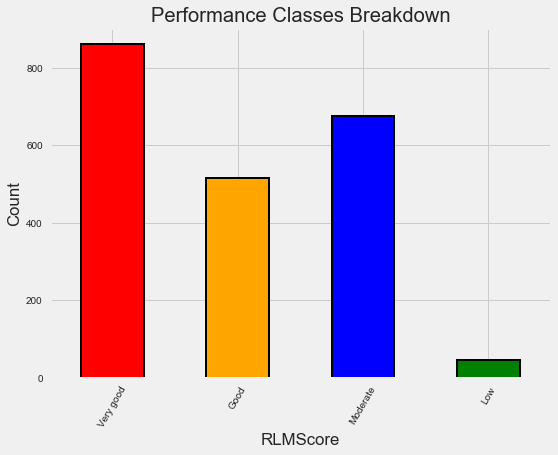

In [999]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')
# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
class_mapping = OrderedDict({1: 'Very good', 2: 'Good', 3: 'Moderate', 4: 'Low'})


label_counts = segmented_rfm['RLMScore'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('RLMScore'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in class_mapping.keys()], 
           list(class_mapping.values()), rotation = 60)
plt.title('Performance Classes Breakdown');

label_counts

### Question C

If you had to design a metric system for an in-game store with soft and hard currencies, what metrics (up to 10) would you monitor and why?

#### User metrics:

- New users (maybe along with retention and churn metrics) : knowing how many new users start playing the game in a particular month might help visualize the growth of of it; also enbales to quantify which marketing channel works best
- Sessions: total playtime per player and when (during the day/night); For the active players, I would separate them by day-hours and night-hours (hours corresponding to their country, log-in hour), minutes spent, in order to know when is best time to upgrade or release version.
- Start levels  
- Fail levels (a user starts a level but does not complete it) 
- Complete levels

The progression metrics (start, fail, complete) are useful in case of leveling component games and help analyse them.

#### More Important - Customer metrics:

- __Sink__ (revenue per user in hard and soft  currency) : how much money a player has spent and where/on what did spend it  
- __Source__  (revenue per user in soft  currency): how much currency  has earned 
- __Flow__ : the total balance of currency that your players have spent and earned)

Sink, Source and Flow can be useful to build up a recommandation system based on players' preferences/behaviour/purchase history for what items should buy
 
#### *Extra: Performance metrics

- rate at which a game executes on a client hardware platform (to know on which platform chancges/updates have to be made)
- impact of patches and updates on how well the client executes: 
- monitoring changing features
- number of bugs found – per hour, day, week or any other timeframe

Note: for part of these matrics, I have looked at this [resource](https://people.ok.ubc.ca/bowenhui/game/readings/ch2-game-metrics.pdf).